In [1]:
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [6]:
df1.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df2.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [10]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
print(df1.dtypes)
print(df2.dtypes)

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object
Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object


In [11]:
unemp_trend = df2.groupby("Date")["Estimated Unemployment Rate (%)"].mean()


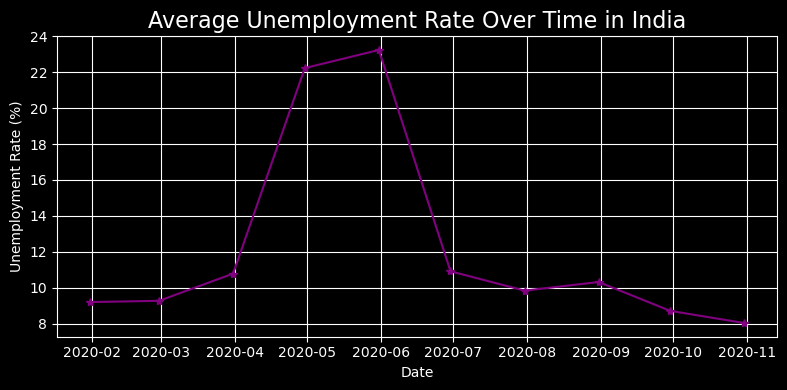

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.style.use('dark_background')
plt.plot(unemp_trend.index, unemp_trend.values, marker='*', color='purple')
plt.title("Average Unemployment Rate Over Time in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Before March 2020
pre_covid = df2[df2['Date'] < '2020-03-01']
# March to June 2020 (lockdown period)
during_covid = df2[(df2['Date'] >= '2020-03-01') & (df2['Date'] <= '2020-06-30')]

In [22]:
print("Average Unemployment Rate (Pre-COVID):", pre_covid["Estimated Unemployment Rate (%)"].mean())
print("Average Unemployment Rate (During COVID):", during_covid["Estimated Unemployment Rate (%)"].mean())

Average Unemployment Rate (Pre-COVID): 9.231346153846154
Average Unemployment Rate (During COVID): 16.74271028037383


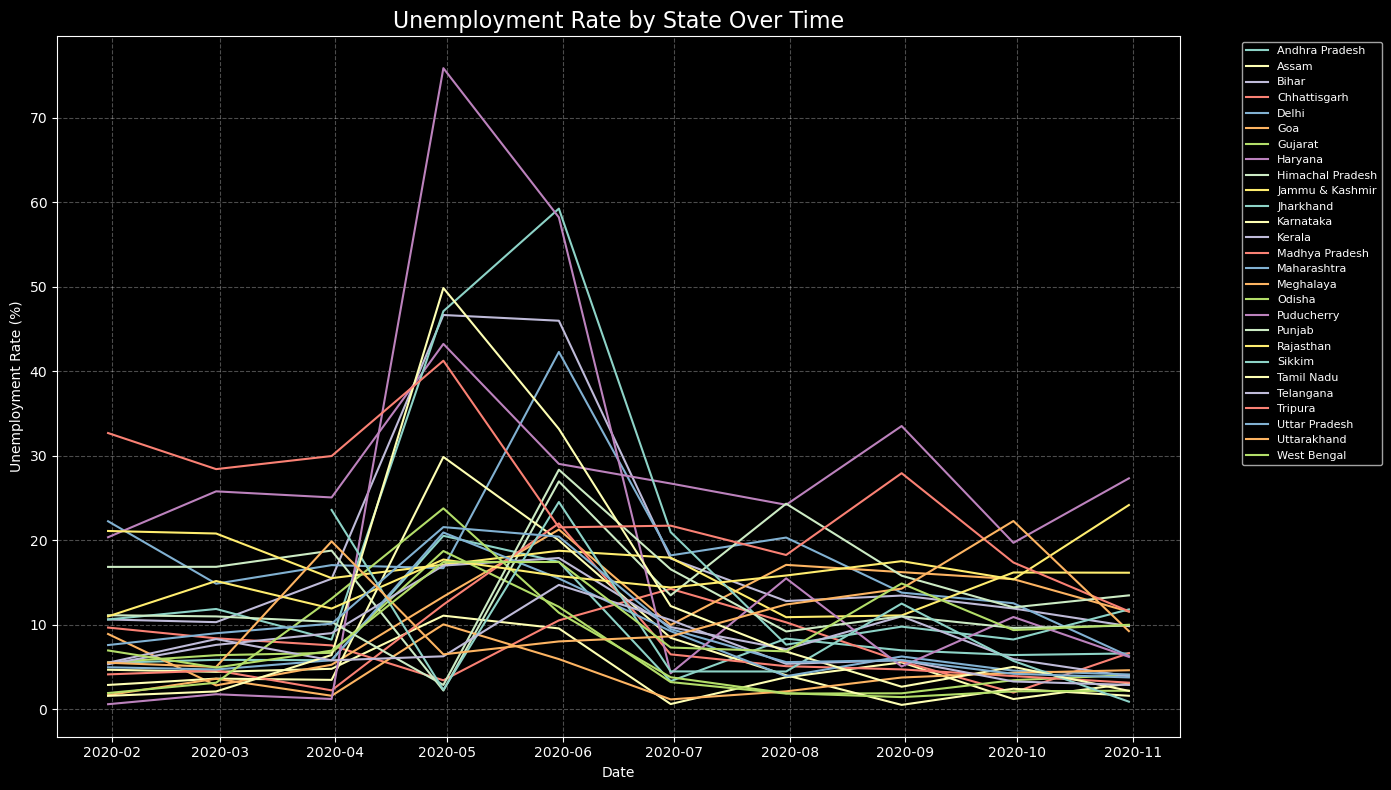

In [30]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(14, 8))
for state in df2['Region'].unique():
    state_data = df2[df2['Region'] == state]
    plt.plot(state_data['Date'], 
             state_data['Estimated Unemployment Rate (%)'], 
             label=state)
plt.title("Unemployment Rate by State Over Time", fontsize=16, color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Unemployment Rate (%)", color='white')
plt.tick_params(colors='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
